## Importing Data From Google Drive




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Coping files from the drive to colab storage for better data loading 

In [ ]:
import shutil

# To copy files
shutil.copyfile('/content/drive/MyDrive/notebooks/test.txt', '/content/sample_data/102/test.txt')
shutil.copyfile('/content/drive/MyDrive/notebooks/train.txt', '/content/sample_data/102/train.txt')
shutil.copyfile('/content/drive/MyDrive/notebooks/valid.txt', '/content/sample_data/102/valid.txt')

# To copy folders
shutil.copytree('/content/drive/MyDrive/notebooks/jpg', '/content/sample_data/102/jpg')

## Importing Packages

In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from datetime import datetime
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
#### CONFIG VARIABLES  ####

Path = "/content/sample_data/102/"
test_file = Path + "test.txt"
train_file = Path + "train.txt"
valid_file = Path + "valid.txt"
categories = ['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower', 'pelargonium', 'bishop of llandaff', 'gaura', 'geranium', 'orange dahlia', 'pink-yellow dahlia?', 'cautleya spicata', 'japanese anemone', 'black-eyed susan', 'silverbush', 'californian poppy', 'osteospermum', 'spring crocus', 'bearded iris', 'windflower', 'tree poppy', 'gazania', 'azalea', 'water lily', 'rose', 'thorn apple', 'morning glory', 'passion flower', 'lotus', 'toad lily', 'anthurium', 'frangipani', 'clematis', 'hibiscus', 'columbine', 'desert-rose', 'tree mallow', 'magnolia', 'cyclamen ', 'watercress', 'canna lily', 'hippeastrum ', 'bee balm', 'ball moss', 'foxglove', 'bougainvillea', 'camellia', 'mallow', 'mexican petunia', 'bromelia', 'blanket flower', 'trumpet creeper', 'blackberry lily']


## Loading and Preparing Data

In [3]:
def load_data(file_name):
    """ 
      read the txt file, cast the data to float and reshape all images to the same width and height]

      Parameters :
         argument1 (string): source file location
      return :
        numpy array of images and the label of each image 
    
    """
    with open(file_name, 'r') as f:
        lines = [line.rstrip().split(" ") for line in f]


    images = [ line[0] for line in lines ]

    images = [ cv2.imread(Path + img) for img in images ] 

    images = np.array ( [ cv2.resize(img, (224,224)) for img in images ]  )

    labels = np.array( [ line[1] for line in lines ] ).astype("float32")

    return images , labels

In [4]:
start_time = datetime.now()

train_X , train_y =  load_data(train_file)

valid_X , valid_y = load_data(valid_file)

test_X , test_y = load_data(test_file)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 0:00:51.709171


### Visualizing Samples

In [5]:
test_X.shape

(6149, 224, 224, 3)

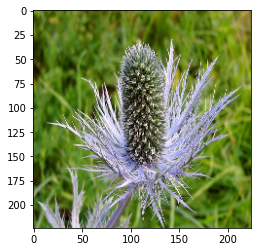

In [6]:

plt.imshow(cv2.cvtColor(test_X[0], cv2.COLOR_BGR2RGB))

plt.show()

In [7]:
type(test_X)

numpy.ndarray

## Defining The Model

In [30]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
model1.add(layers.MaxPooling2D(4,4))
model1.add(layers.BatchNormalization())
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D(4,4))
model1.add(layers.BatchNormalization())
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(102, activation='softmax'))

model1.summary()

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=5, restore_best_weights=True)

history = model1.fit(train_X , train_y, callbacks=[callback], validation_data = (valid_X , valid_y), steps_per_epoch=200, epochs=50)


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 55, 55, 32)        0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 55, 55, 32)        128       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 53, 53, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 13, 13, 64)        256       
_________________________________________________________________
flatten_11 (Flatten)         (None, 10816)           

## Ploting The Results

In [34]:
img_shape = (224, 224, 3)

def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

def plotAccuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='upper right')
    plt.show()

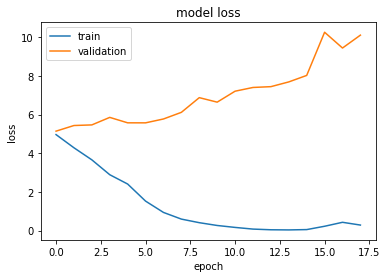

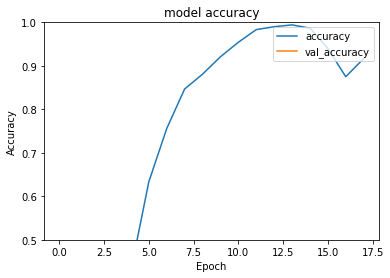

In [35]:
plotLosses(history)
plotAccuracies(history)

### There is overfitting because the training data is so small and the test accuracy is


In [37]:
test = model1.evaluate(test_X , test_y)

193/193 [==============================] - 3s 16ms/step - loss: 7.9715 - accuracy: 0.1390
